If you're relatively new to machine learning and have been overwhelmed by other entrees, this is a beginner's perspective for other beginners. My personal experience with ML is minimal. I've only taken a single university introductory level class, and I'm currently reading Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow for guidance. I'm still learning and fully expect errors, so please point them out! If you're looking for additional help on specific ML topics and concepts, I find https://machinelearningmastery.com/ very resourceful.

For this project, we have three files:
- sample_submission.csv: an example/benchmark submission file with Id and SalePrice. These predictions were created with a linear regression formula based on a few explanatory variables. 
- test.csv: our test set with 1459 instances and 80 attributes. It does not contain our target variable.
- train.csv: our training set with 1460 instances and 81 attributes. 
- data_description.txt: metadata for our features. It provides a short description and an idea of possible values for each explanatory variable.

Let's define the scope of work.

## Scope of Work

|Deliverable|Tasks                    |
|:----------:|:------------------------|
|1. Framing the problem|<ul><li>Define the objective</li><li>Define how to frame the objective under Machine Learning</li><li>Define how performance should be measured</li><li>Define the minimum performance needed to achieve the objective</li><li>List and verify all assumptions</li></ul>|
|2. Gathering the data|<ul><li>List the data needed and how much is required</li><li>Grab and convert the data so that it can be worked with</li><li>Check the size and type of data</li><li>Split the data into an appropriately proportioned training and test sets</li></ul>|
|3. Explore the data|<ul><li>Study each attribute and their characteristics</li><li>Visualize the data</li><li>Study the relationships between attributes</li></ul>|
|4. Prepare the data|<ul><li>Clean the data</li><li>Feature selection</li><li>Feature engineer</li><li>Feature scale</li></ul>|
|5. Select a model|<ul><li>Train many quick and dirty models from different categories using standard parameters</li><li>Analyze the type of errors the models make</li><li>Perform a quick round of feature selection and engineering</li><li>Perform and iterate on the last previous steps until...</li><li>You can shortlist the 3-5 most promising models</li></ul>|
|6. Fine-tune the system|<ul><li>Fine-tune the hyperparameters using cross-validation</li><li>Try ensemble methods</li><li>Narrow the final model and once you're confident about its performance, measure its performance on the test set to estimate the generalization error</li></ul>|
|7. Submit your solution|<ul>Apply and submit the model against unknown data</ul>|

# 1. Framing the Problem

- Define the objective
- Define how to frame the objective under Machine Learning
- Define how performance should be measured
- Define the minimum performance needed to achieve the objective
- List and verify all assumptions

## 1.1 Define the objective

We are challenged to find an optimal regression model that predicts the final sale price of residential homes in Ames, Iowa at the time the data was collected. There are 79 explanatory variables to consider, and we are recommended to use this opportunity to practice our creative feature engineering and advanced regression techniques skills.

Our dependent/target variable: $ y = $ SalePrice

Our independent variables: $ X =$ {$x_1, x_2, ..., x_{79}$}

## 1.2 Define how to frame the objective under Machine Learning

Let's establish where this problem fits in the machine learning world by considering the following:

- The size of our combined data is relatively tiny (~3000 records), which means we can use batch learning (using all the available data at once)
- We don't have to worry about future data; we're only looking at a snap shot in time, meaning we don't need to worry about consistently adjusting the model with time
- Our training set includes the desired solution, SalePrice - our label. This means we have a supervised learning problem
- We know that SalePrice is a continuous variable, and it's the only attribute we need to predict, making this project a univariate regression problem

This project falls under a supervised batch learning univariate regression problem.

## 1.3 Define how performance should be measured

-------

1. The adjusted coefficient of determination, a.k.a. the adjusted R squared

$$ \text{Adjusted } R^2 = 1 - \dfrac{(1 - R^2)(N - 1)}{(N - p - 1)} $$
where 

$N\text{ = Total Sample Size }$

$p\text{ = Number of independent variables  } $

$R^2\text{ = Sample R-squared  }$

The adjusted R squared is a modification of the coefficient of multiple correlation $R^2$ which measures the percentage of variation in our dependent variable that is predictable by our explanatory variables. The closer it is to 100%, the more correlated our combined collection of independent variables (X) are to our dependent variable (y). This coefficient is denoted by the following formula:

$$ R^2 = 1 - \dfrac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}} $$
where 

$\hat{y} = $ predicted SalePrice value

$\bar{y} = $ sample SalePrice mean

R squared has a major flaw, its value never dips when variables are added to the regression line, even if they're completely unrelated to our target variable. That's where the adjusted R squared comes in, it informs you of the percentage of variation explained by the informative independent variables. It accomplishes this by adding a penalty for each independent variable that adds zero benefit to the model.

2. Root Mean Square Error

$$ RMSE = \sqrt{\dfrac{1}{m}\sum^{m}_{i=1}(\hat{y_i} - y_i)^2} $$

The root mean square error gives you an absolute value that averages the squared distance between all predictions and their true value. The larger it is, the more your model isn't doing so well.

This cost function penalizes really bad predictions.

3. Mean Absolute Error

$$ MAE = {\dfrac{1}{m}\sum^{m}_{i=1}|\hat{y_i} - y_i|} $$

The mean absolute error is very similar to RMSE, except every individual difference have equal weight.

> $\hat{y_i} = $ ith predicted SalePrice value

> $y_i = $ ith actual SalePrice value

> $m = $ number of instances in the dataset

## 1.4 Define the minimum performance needed to achieve the objective

Since we weren't given any kind of threshold to beat, let's just try to outperform a simple linear regression model. 

## 1.5 List and verify all assumptions

Assumptions:

- We've been given all the data we require and have no need to look for more
- Our training data is representative of new cases that we want to generalize to
- There is little to no inherent sampling biases
- There are no irrelevant features that we can directly rule out without investigation
- We can relate and draw meaning from other examples and real-world intuition/common-sense - this assumes that our data follows certain real-world conventions

Verification to follow in our implementation.


# 2. Gathering the data
- List the data needed and how much is required
- Grab and convert the data so that it can be worked with
- Check the size and type of data
- Split the data into training and test sets

## 2.1 List the data needed and how much is required

Within the confines and rules of this project, we can only work with the data provided. Therefore, we'll stick with what we've been given and assume it's enough to fulfill our objective.

## 2.2 Grab and convert the data so that it can be worked with


In [1]:
import numpy as np              # linear algebra
import pandas as pd             # data processing
import matplotlib.pyplot as plt # visualizing graphs
from copy import deepcopy

pd.options.display.float_format = '{:,.2f}'.format # change floating point representation

WORKING_DIRECTORY = "/kaggle/input/house-prices-advanced-regression-techniques/" 
TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"

X_y_train = pd.read_csv(WORKING_DIRECTORY + TRAIN_FILE_NAME, index_col = "Id")
X_test = pd.read_csv(WORKING_DIRECTORY + TEST_FILE_NAME, index_col = None)
X_test_id = X_test.pop('Id')


"""According to our metadata, NA is a valid value for several columns.
Unfortunately, when we call read_csv it assumes "NA" is a missing value by
default for all columns, so we'll have to revert these particular columns after load.
There are no other missing values besides "NA" in these datasets"""
LEGAL_NA_COLS = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure",
                 "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", 
                 "GarageFinish", "GarageQual", "GarageCond", 
                 "PoolQC", "Fence", "MiscFeature"]
for df in [X_y_train, X_test]:
    df[LEGAL_NA_COLS] = df[LEGAL_NA_COLS].fillna(value="None")

# combined test and train
X_all = pd.concat([X_y_train.drop(columns="SalePrice"), X_test], ignore_index=True, sort=False)

## 2.3 Check the size and type of data

In [2]:
STDOUT_LINE_BAR = "-" * 40

# print dataset dtypes, n rows and variables
def examine_dfs(alldataX: pd.DataFrame, 
                trainXy: pd.DataFrame, 
                testXy: pd.DataFrame, 
                long_summary: bool = True) -> None:
    total_instances = alldataX.shape[0]
    print(f"We have {total_instances} rows in total")
    print(f"The training set has {trainXy.shape[0]} instances ({trainXy.shape[0]/total_instances * 100:.2f}% of the rows)")
    print(f"The test set has {testXy.shape[0]} instances ({testXy.shape[0]/total_instances * 100:.2f}% of the rows)")
    print("\nCombined set info (without dependent variable(s)):\n" + STDOUT_LINE_BAR) 
    alldataX.info(verbose=long_summary)
    
examine_dfs(X_all, X_y_train, X_test, long_summary = False)

We have 2919 rows in total
The training set has 1460 instances (50.02% of the rows)
The test set has 1459 instances (49.98% of the rows)

Combined set info (without dependent variable(s)):
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 79 entries, MSSubClass to SaleCondition
dtypes: float64(11), int64(25), object(43)
memory usage: 1.8+ MB


# 3. Explore the data

- Study each attribute and their characteristics
- Visualize the data
- Study the relationships between attributes
- Identify promising unbiased transformations

## 3.1 Study each attribute and their characteristics

Let's preview a few rows to get a sense of what we're dealing with.

In [3]:
X_all.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


Let's get a general sense of data types, number of distinct values, unique values, proportion of missing values, kurtosis (peak sharpness, measure of tail weight), skewness (tail direction) across all our values

In [4]:
def summarize_training_set(df: pd.DataFrame, target_var) -> pd.DataFrame:
    n_distincts = df.apply(lambda x: x.unique().shape[0])
    unique_vals = df.apply(lambda x: x.unique())
    missing_count = df.apply(lambda x: x.isnull().sum())
    corr = df.corr()[target_var]
    missing_ratio = (df.isnull().sum()/df.shape[0]) * 100
    skewness = df.select_dtypes(exclude=['object']).skew()
    kurtosis = df.select_dtypes(exclude=['object']).kurt()
    summary_data = [df.dtypes, n_distincts, unique_vals, missing_count, missing_ratio, skewness, kurtosis, corr]
    summary_colnames = ["type", "n_distincts", "unique_vals", "missing_count", "missing_ratio", "skewness", "kurtosis", f"corr {target_var}"]
    summary_df = pd.concat(summary_data, axis=1, sort=False)
    summary_df.columns = summary_colnames
     
    print(f"Rows: {df.shape[0]}\nCols: {df.shape[1]}")
    print(f"Data types:\n{summary_df['type'].value_counts().to_string()}")
    return summary_df

summary = summarize_training_set(X_y_train, "SalePrice").sort_values(by="missing_ratio",ascending=False)
summary

Rows: 1460
Cols: 80
Data types:
object     43
int64      34
float64     3


,type,n_distincts,unique_vals,missing_count,missing_ratio,skewness,kurtosis,corr SalePrice
LotFrontage,float64,111,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",259,17.74,2.16,17.45,0.35
GarageYrBlt,float64,98,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",81,5.55,-0.65,-0.42,0.49
MasVnrArea,float64,328,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",8,0.55,2.67,10.08,0.48
MasVnrType,object,5,"[BrkFace, None, Stone, BrkCmn, nan]",8,0.55,NaN,NaN,NaN
Electrical,object,6,"[SBrkr, FuseF, FuseA, FuseP, Mix, nan]",1,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ExterCond,object,5,"[TA, Gd, Fa, Po, Ex]",0,0.00,NaN,NaN,NaN
ExterQual,object,4,"[Gd, TA, Ex, Fa]",0,0.00,NaN,NaN,NaN
Exterior2nd,object,16,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...",0,0.00,NaN,NaN,NaN
Exterior1st,object,15,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...",0,0.00,NaN,NaN,NaN


In [5]:
# percentage of missing values in both sets
proportion_missing = (X_all.isnull().sum() / X_all.shape[0]).sort_values(ascending=False)
print("Percentage of missing values by each attribute in the combined set")
proportion_missing[proportion_missing > 0.001]

Percentage of missing values by each attribute in the combined set


LotFrontage   0.17
GarageYrBlt   0.05
MasVnrType    0.01
MasVnrArea    0.01
MSZoning      0.00
dtype: float64

We have quite a lot of ground to cover, so for the sake of simplicity we will group and treat attributes by their similarities (data type, unique values and level of measurement). For additional information, we can utilize data_description.txt as a source of metadata.

Note that there are two typos in "data_description.txt" file where the attributes Kitchen and Bedroom should be KitchenAbvGr and BedroomAbvGr

- Categorical: Nominal
  - MSSubClass, MSZoning, Street, Alley, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, PavedDrive, MiscFeature, SaleType, SaleCondition, YearBuilt, YearRemodAdd, YrSold, GarageYrBlt, MoSold, Fence, LandContour, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC
- Categorical: Ordinal (pure)
  - LotShape, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, HeatingQC, KitchenQual, Functional 
- Numerical: Discrete
  - LotArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
- Numerical: Continuous
  - LotFrontage, MasVnrArea

In [6]:
# we have A LOT of features to manage

target_var = "SalePrice"

num_feats = ["LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
             "TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
             "GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath",
             "HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
             "Fireplaces","GarageCars","GarageArea","WoodDeckSF",
             "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
             "PoolArea","MiscVal","LotFrontage","MasVnrArea"]

ord_cat_feats = ["LotShape","LandSlope","OverallQual","OverallCond",
                 "ExterQual","ExterCond","HeatingQC","KitchenQual",
                 "Functional"]
                 
nom_cat_feats = ["MSSubClass","MSZoning","Street",
                 "Alley","Utilities","LotConfig","Neighborhood",
                 "Condition1","Condition2","BldgType","HouseStyle",
                 "RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                 "MasVnrType","Foundation","Heating","CentralAir",
                 "Electrical","GarageType","PavedDrive","MiscFeature",
                 "SaleType","SaleCondition","YearBuilt","YearRemodAdd", 
                 "YrSold","GarageYrBlt","MoSold","Fence","LandContour", 
                 "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                 "BsmtFinType2", "FireplaceQu","GarageFinish","GarageQual",
                 "GarageCond","PoolQC"]

cat_feats = ord_cat_feats + nom_cat_feats

## 3.2 Visualize the data

Let's start by examining the spread of missing values

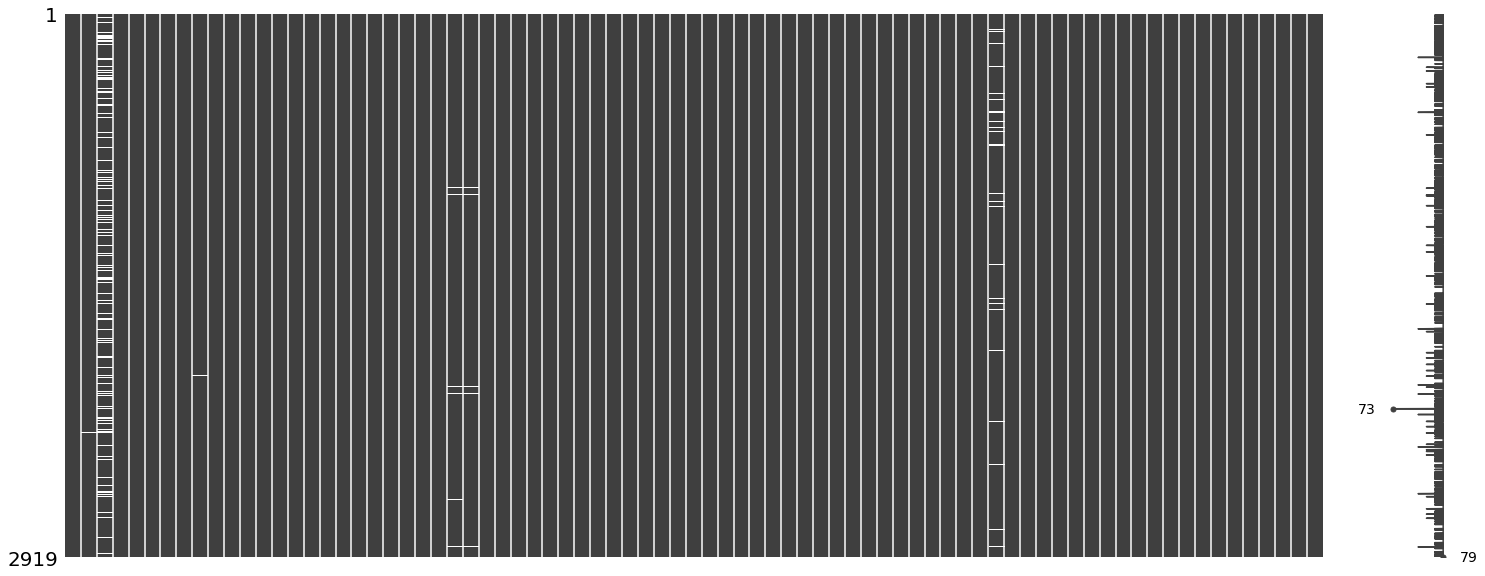

In [7]:
# examine missing data spread
import missingno as msno
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(X_all)
plt.show()

- Looking at the spark chart on the right, most of our instances have values across all attributes. 
- Most features have very few missing values.

<AxesSubplot:>

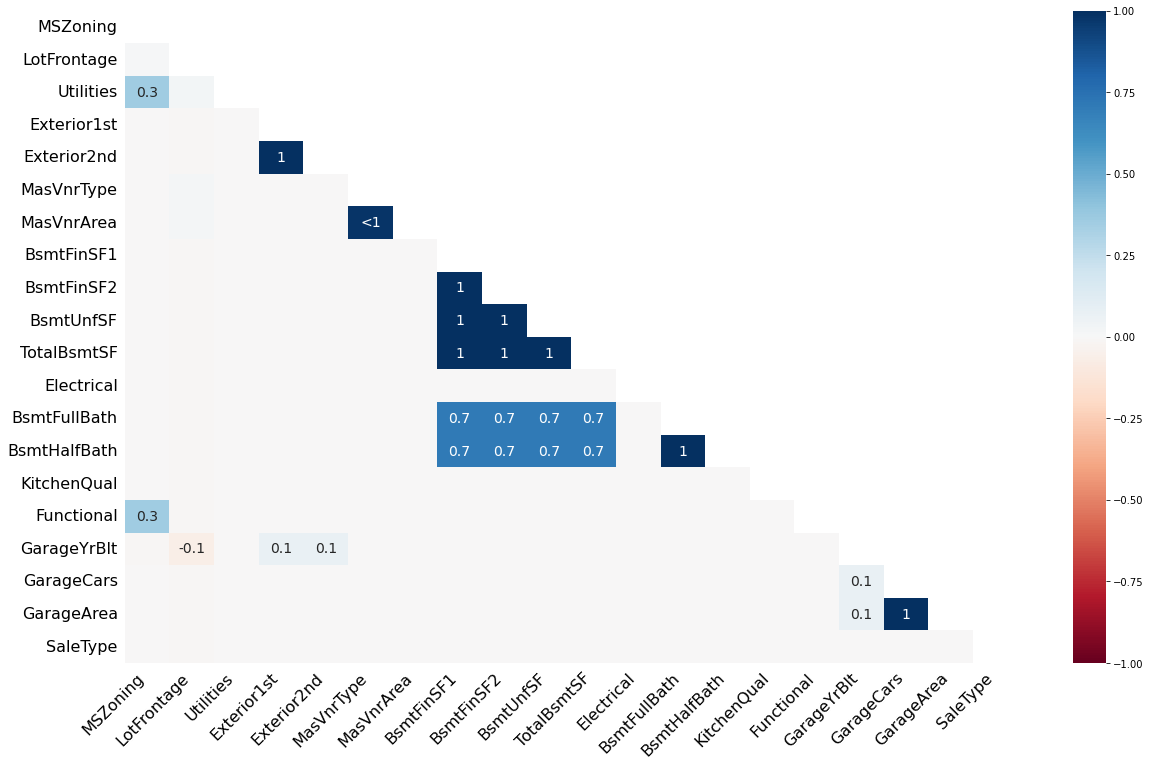

In [8]:
msno.heatmap(X_all)

- Our correlated null values are centered around basement attributes that are very similar, which isn't an issue given that they're likely multicollinear in the first place. We'll address multicollinearity later.

There aren't any significant trends or patterns in our missing values, so we'll move on to examining existing data through our features and target variable in our training set.

Since we're interested in predicting SalePrice, let's first visualize its whisker plot, histogram, and a Q-Q plot. The Q-Q plot serves as our reference to check and see if SalesPrice is approximately normally distributed. 

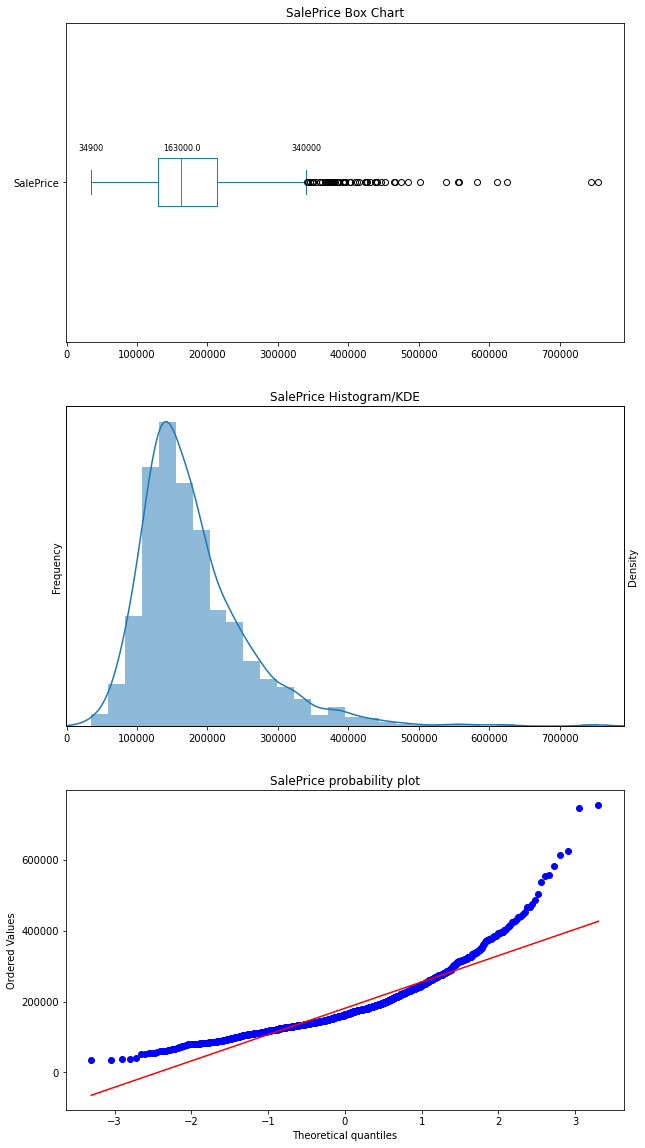

In [9]:
from matplotlib import cbook
from scipy import stats
import seaborn as sns

def plot_continuous_attrib(df, attrib):

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))
    
    # box chart
    df[attrib].plot(kind='box', ax=axes[0], vert=False)
    axes[0].set_title(f"{attrib} Box Chart")
    bp_stats = cbook.boxplot_stats(df[attrib])
    tick_values = [bp_stats[0]['whislo'],bp_stats[0]['med'],bp_stats[0]['whishi']]
    for v in tick_values:
        axes[0].text(v, 1.1, str(round(v,1)), fontsize=8, horizontalalignment='center')

    # hist chart
    df[attrib].plot(kind='hist', density=True,
                bins=30, alpha=0.5, ax=axes[1])

    # kde chart
    combined_ax1 = axes[1].twinx()
    sns.kdeplot(data=df, x=attrib, ax=combined_ax1)
    combined_ax1.set_title(f"{attrib} Histogram/KDE")
    combined_ax1.set_xlim(axes[0].get_xlim())
    
    axes[1].set_yticks([])
    combined_ax1.set_yticks([])

    # probplot
    stats.probplot(df[attrib], plot=axes[2])
    axes[2].set_title(f"{attrib} probability plot")

plot_continuous_attrib(X_y_train, "SalePrice")

Our SalePrice follows a rough log-normal distribution, with a good amount of outliers. Let's transform it into its log(x) state that will minimize skewness and utilize a normal distribution to work within the bounds of the central limit theorem, thereby improving the linearity between the target variable and our independent variables.

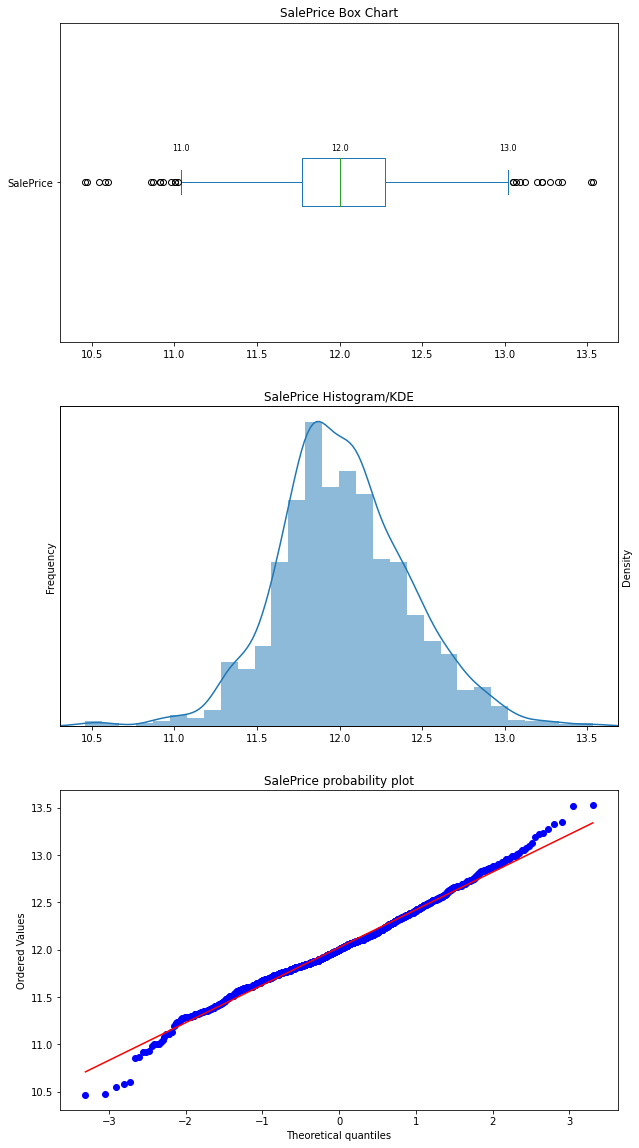

In [10]:
X_y_train['SalePrice'] = np.log1p(X_y_train['SalePrice']) # +1 to avoid undefined log(0) instances

plot_continuous_attrib(X_y_train, "SalePrice")

This transformation will allow us to find a regression equation that is more in line with the central limit theorem.

Concerning our features - since we have so many, let's get a sense of highly correlated variables. We could use a heatmap, but given the number of columns we have to work with, let's just automatically find relationships that have a significant correlation level.

In [11]:
CORR_THRESHOLD = 0.6

def find_relevant_corr(df: pd.DataFrame, 
                       dependent_attrib: str, 
                       corr_thresh: float) -> pd.DataFrame:
    
    correlations = df.corrwith(df[dependent_attrib]).sort_values(ascending=False).drop(labels=dependent_attrib)
    relevant_correlations = correlations[(correlations >= corr_thresh) | (correlations <= -corr_thresh)]
    
    return relevant_correlations if len(relevant_correlations) > 0 else None

num_attribs = ["SalePrice"] + num_feats

for num_attrib in num_attribs:
    relevant_correlations = find_relevant_corr(X_y_train[num_attribs], num_attrib, CORR_THRESHOLD)
    if relevant_correlations is not None: 
        print(f"{num_attrib}:\n------------\n{relevant_correlations.to_string()}\n")

SalePrice:
------------
GrLivArea     0.70
GarageCars    0.68
GarageArea    0.65
TotalBsmtSF   0.61

BsmtFinSF1:
------------
BsmtFullBath   0.65

TotalBsmtSF:
------------
1stFlrSF    0.82
SalePrice   0.61

1stFlrSF:
------------
TotalBsmtSF   0.82

2ndFlrSF:
------------
GrLivArea      0.69
TotRmsAbvGrd   0.62
HalfBath       0.61

GrLivArea:
------------
TotRmsAbvGrd   0.83
SalePrice      0.70
2ndFlrSF       0.69
FullBath       0.63

BsmtFullBath:
------------
BsmtFinSF1   0.65

FullBath:
------------
GrLivArea   0.63

HalfBath:
------------
2ndFlrSF   0.61

BedroomAbvGr:
------------
TotRmsAbvGrd   0.68

TotRmsAbvGrd:
------------
GrLivArea      0.83
BedroomAbvGr   0.68
2ndFlrSF       0.62

GarageCars:
------------
GarageArea   0.88
SalePrice    0.68

GarageArea:
------------
GarageCars   0.88
SalePrice    0.65



Given the high dimensionality of our datasets, there's a large presence of multicollinearity between our independent variables. Depending on our model, we may face some performance issues if multicollinearity is left unresolved. We'll address these relationships in the next section.

For now, let's visualize our most influential numerical features on SalesPrice

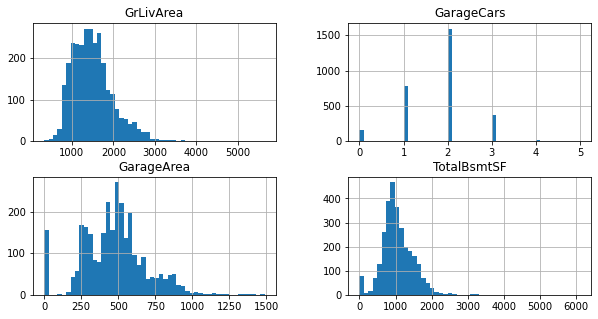

In [12]:
top_correlators = ["GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]

X_all[top_correlators].hist(bins=50, figsize=(10,5))
plt.show()

- We have a variation of scales - something we'll have to keep in mind when we get to feature scaling
- There doesn't seem to be any unnatural preprocessing caps 
- These features aren't normally distributed

Let's see what the scatter graphs look like between these features and SalePrice

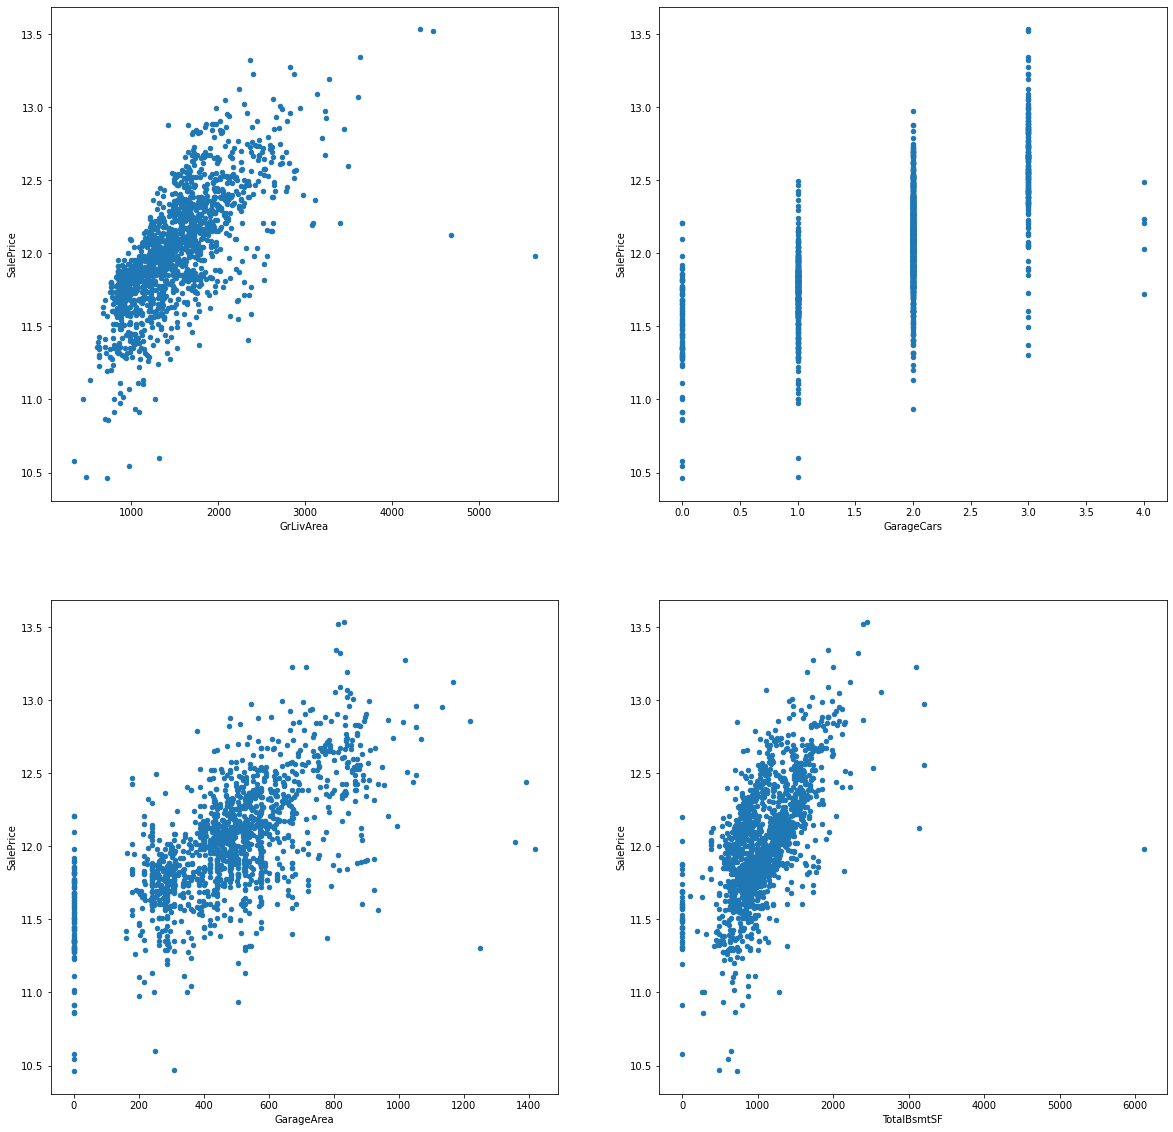

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
x, y = 0, 0

for feature in top_correlators:
    X_y_train.plot.scatter(ax=axes[y][x], y="SalePrice", x=feature)
    x += 1
    if x == 2:
        x = 0
        y += 1

We have a few outliers that will likely need to be addressed later, but in general, each variable has a nice narrow band to form a linear relationship with SalePric

To get a sense of the relationship between categorical variables and SalePrice, we can work with some boxplots. 
- Boxes that have a lot of overlap indicate a weak correlation. 
- Conversely, the absence of overlap is an indication of strong correlation.

Since we have many categorical variables to choose from, let's use the anova test to find the non-binary categorical variables that are particularly relevant, and then show off their boxplots. We'll use the t-test where necessary for binary categorical variables.

If you're unfamiliar with those concepts, see this [link](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [14]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols

def get_cat_num_associations(df: pd.DataFrame, column_names: list, dependent_name: str) -> pd.DataFrame:
    "Perform an association test on each categorical variable and store the results in a dataframe"    
    cat_scores = pd.DataFrame(data=[], columns=['F','PR(>F)']) 

    for category in column_names:
        if df[category].nunique() > 2:
            model = ols(f'{dependent_name} ~ {category}', data = df).fit()
            anova_results = sm.stats.anova_lm(model)
            f = anova_results["F"][0]
            pr_f = anova_results["PR(>F)"][0]
            cat_scores.loc[category] = [f, pr_f]
        elif df[category].nunique() == 2:
            print(f"Can't perform anova test on {category} since it has only 2 possible values, reverting to t test:")
            group1_name = df[category].unique()[0]
            group2_name = df[category].unique()[1]
            group1 = df.query(f'{category} == "{group1_name}"')[dependent_name] 
            group2 = df.query(f'{category} == "{group2_name}"')[dependent_name] 
            t, p_val, dof = ttest_ind(group1, group2)
            print(f"t = {t}, p_val = {p_val}")
            if p_val <= 0.05:
                print(f"{category}'s {group1_name} and {group2_name} have {dependent_name} means that are statistically different\n")
            else:
                print(f"{category}'s {group1_name} and {group2_name} have {dependent_name} means that are NOT statistically different\n")
        else:
            print(f"{category} has only 1 value, it can't be tested for association")
    return cat_scores.sort_values(by="F", ascending=False) 

cat_fscores = get_cat_num_associations(X_y_train, cat_feats, 'SalePrice')

Can't perform anova test on Street since it has only 2 possible values, reverting to t test:
t = 2.194181953432869, p_val = 0.028379646829018543
Street's Pave and Grvl have SalePrice means that are statistically different

Can't perform anova test on Utilities since it has only 2 possible values, reverting to t test:
t = 0.48237978595080444, p_val = 0.6296085870536641
Utilities's AllPub and NoSeWa have SalePrice means that are NOT statistically different

Can't perform anova test on CentralAir since it has only 2 possible values, reverting to t test:
t = 14.341060197515919, p_val = 9.85987751015826e-44
CentralAir's Y and N have SalePrice means that are statistically different



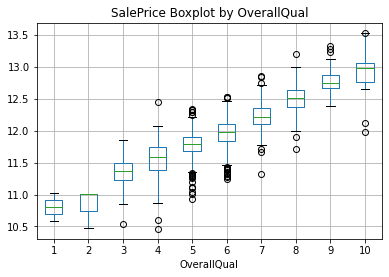

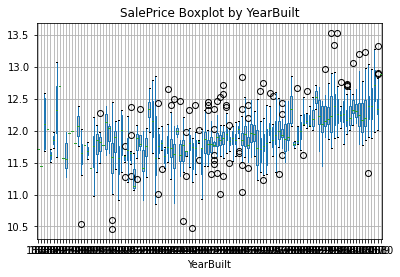

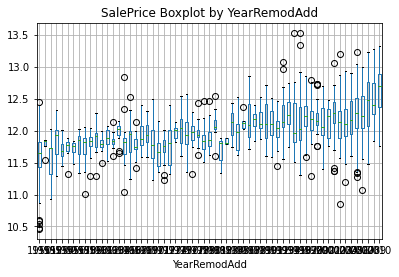

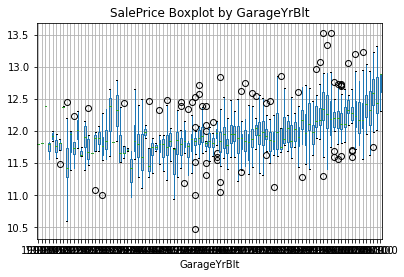

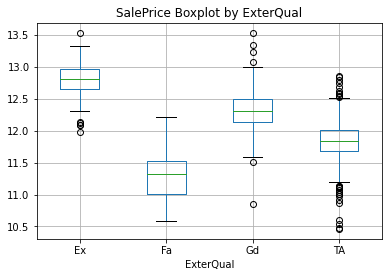

In [15]:
for category in cat_fscores['F'].nlargest(5).index:
    X_y_train.boxplot('SalePrice', by=category)
    plt.title(f"SalePrice Boxplot by {category}")
    plt.suptitle("")
    plt.show()

The categorical features visualized above reveal attributes that will clearly provide significant information in our regression model.

## 3.3 Study relationships between variables




We discovered a few correlations between independent variables earlier. Let's use a heatmap to get a sense of how extensive these relationships are.

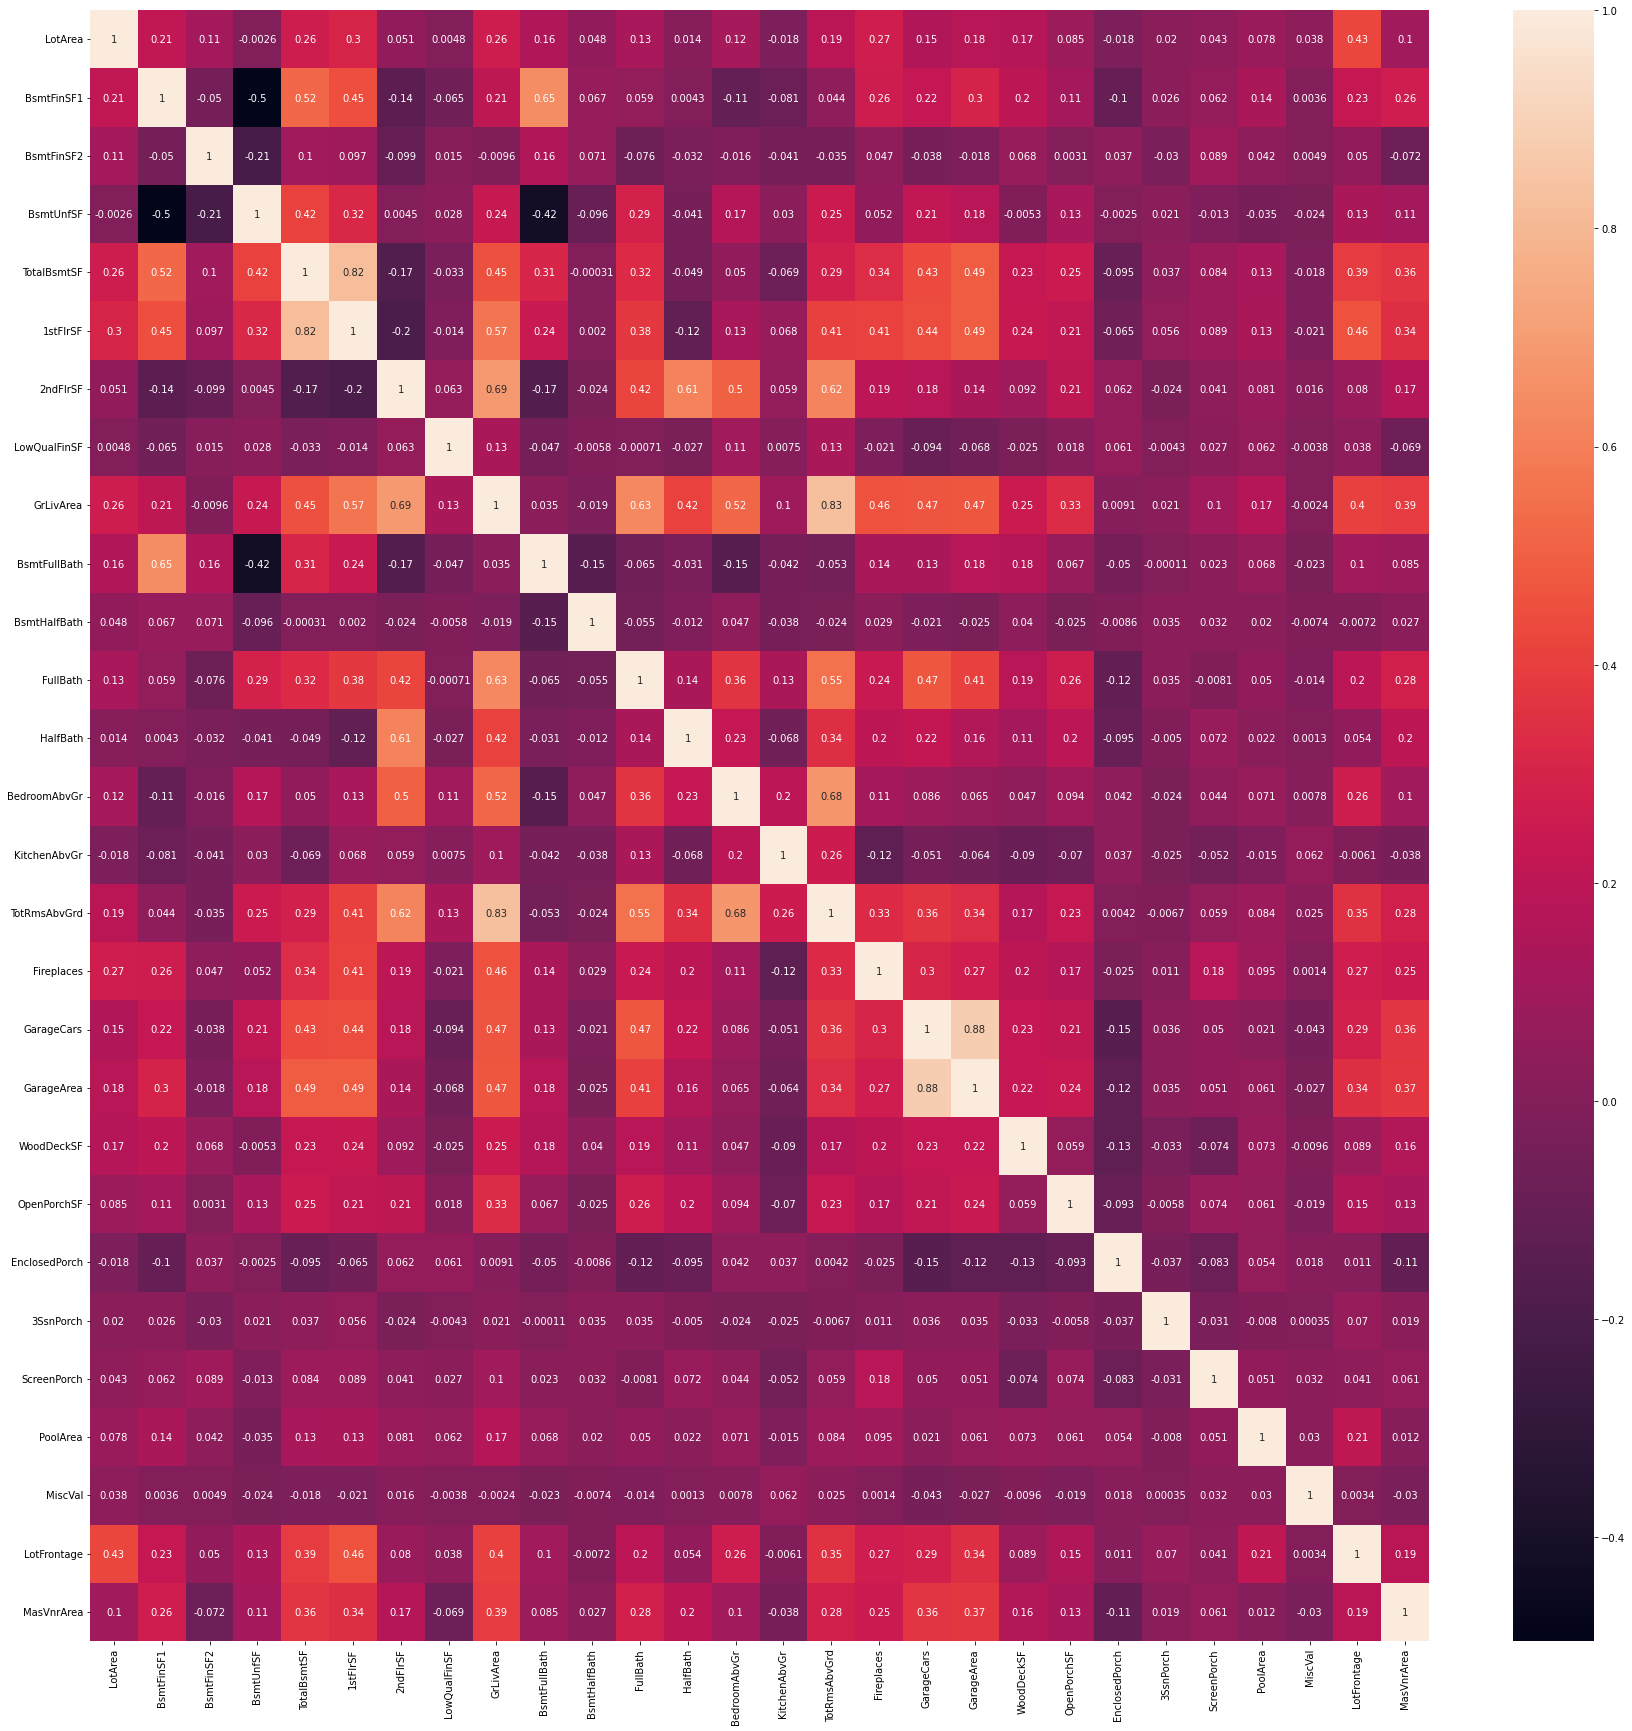

In [16]:
import seaborn as sns
# examine pearson's correlation between numerical variables

plt.figure(figsize=(30,30))
sns.heatmap(X_y_train[num_feats].corr(),annot=True)
plt.show()

We have some major multicollinearity concerns between the following variables for a corr threshold of >= 0.7  or <= -0.7:
- GarageCars and GarageArea,
- TotRmsAbvGrd and GrLivArea,
- 1stFlrSF and TotalBsmtSF

Including all of these numerical features in our regression model will likely introduce redundant information and impact our model's performance. We'll keep that in mind for later.

# 4. Prepare the Data

- Clean the data
- Feature engineer
- Feature scale
- Feature selection

## 4.1 Clean the data

- Handling missing values
- Handling disruptive outliers
- Converting text/categorical attributes

### 4.1.1 Handling missing values

Let's revisit our missing values

In [17]:
missing_vals = X_all.isna().sum()
print(missing_vals[missing_vals>0].sort_values(ascending=False),"\n")

LotFrontage     486
GarageYrBlt     159
MasVnrType       24
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
Utilities         2
Functional        2
BsmtHalfBath      2
GarageArea        1
GarageCars        1
KitchenQual       1
TotalBsmtSF       1
Electrical        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64 



Let's tackle the fields with the biggest chunks of missing data first, and then come up with a general strategy for the rest

1. LotFrontage: Linear feet of the street connected to property 

~ 18% values missing, discrete numeric variable with a roughly normal distribution, prone to outliers

We can infer this value based on a few variables, where we can use a groupby method to extract the median value.

> imputation strategy: groupby("LandContour","Neighborhood","Street").median()

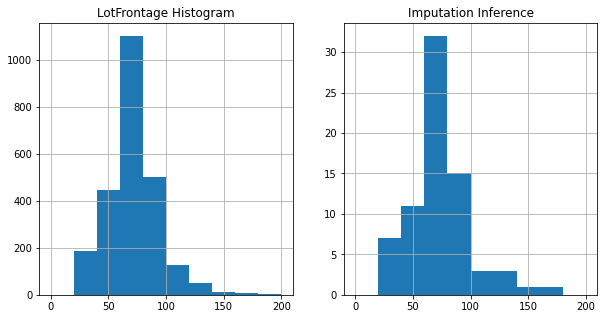

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_all["LotFrontage"].hist(ax=axes[0],range=(0,200)).set_title("LotFrontage Histogram")
X_all.groupby(by=["LandContour","Neighborhood","Street"]).median()["LotFrontage"].hist(ax=axes[1],range=(0,200)).set_title("Imputation Inference")
plt.show()

Close enough!

In [19]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    X_y_train["LotFrontage"] = X_y_train.groupby(by=["LandContour","Neighborhood","Street"])["LotFrontage"].apply(lambda x: x.fillna(x.median()))
    X_y_train["LotFrontage"].fillna(value=X_y_train["LotFrontage"].median(), inplace=True) # for pockets of NaNs in landcontour, neighborhood and street
    # to prevent data leakage, we'll simply use the train set's median for our test set's imputation
    X_test["LotFrontage"].fillna(value=X_y_train["LotFrontage"].median(), inplace=True) 

2. GarageYrBlt: The year the garage was built

~ 6% values missing, discrete numeric variable with a multimodal distribution skewing left, absence of outliers

All missing values are associated with a legal NA (None) value in GarageFinish/GarageLocation/..., supporting the theory that an absence of a garage causes the missing value. We can remediate this through a constant value to suggest that certain observations have no date. 

imputation strategy: constant ("None") 

In [20]:
for df in [X_y_train, X_test]:
    df["GarageYrBlt"].fillna(value="None", inplace=True)  

3. Other potential legal NA associations with missing values
- GarageCars and GarageArea dependent on GarageFinish and other Garage related variables with NA values,
- BsmtFinSF2 dependent on BsmtFinType2,
- BsmtFinSF1 dependent on BsmtFinType1,
- MasVnrArea dependent on MasVnrType

> Let's see if we can find any particular observations where that's the case

In [21]:
missing_values_associations = [("GarageCars","GarageFinish"),("GarageArea","GarageFinish"),("BsmtFinSF2","BsmtFinType2"),
                              ("BsmtFinSF1","BsmtFinType1"),("MasVnrArea","MasVnrType")]

for var1, var2 in missing_values_associations:
    mask = X_all[var1].isnull()
    print(X_all[mask][[var1,var2]].value_counts(dropna=False).to_string())

GarageCars  GarageFinish
NaN         None            1
GarageArea  GarageFinish
NaN         None            1
BsmtFinSF2  BsmtFinType2
NaN         None            1
BsmtFinSF1  BsmtFinType1
NaN         None            1
MasVnrArea  MasVnrType
NaN         NaN           23


Looks like my assumptions were mostly correct, it makes sense to clean all these occurences with a 0.

We could assume that MasVnrType and MasVnrArea with NaN's signify an absence of masonry veneer, but since there's no real evidence to suggest such a thing, we'll have to consider a variety of imputation methods during hyperparameter selection/tuning.

> imputation strategy (num cols above): 0

> imputation strategy (MasVnrArea and MasVnrType): constant (None) or Median/Most frequent

In [22]:
for df in [X_y_train, X_test]:
    for var1, var2 in missing_values_associations:
        df[var1].fillna(0, inplace=True)
        if var2 == "MasVnrType":
            df[var2].fillna("None", inplace=True)

4. Leftover categories imputation strategy: most frequent

and 

5. Leftover numerics imputation strategy: median

In [23]:
missing_cats = set(X_test.select_dtypes('object')).union(set(X_y_train.select_dtypes('object')))
missing_nums = set(X_test.select_dtypes('int64','float64')).union(set(X_y_train.select_dtypes('int64','float64')))

for df in [X_test, X_y_train]:
    for cat in missing_cats:
        df[cat] = df[cat].fillna(value=df[cat].mode().iloc[0])
    for num in missing_nums:
        df[num].fillna(value=df[num].median(), inplace=True)

### 4.1.2 Handling disruptive outliers

Lets use the [IQR method](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/) to identify and manage our outliers. Now, considering we have many variables and our dataset is relatively small, it may not be the best idea to remove a sample that has an outlier in a variable that has next to no correlation with SalePrice. Whenever we remove an instance, it's effectively leaking a bunch of data from other variables - data that may hold more value than our misleading outlier. To counter this, let's try to focus on numeric variables that correlate significantly with SalePrice.

In [24]:
def IQR_outliers(df: pd.DataFrame, 
                 num_features: list, 
                 threshold_multiplier: int) -> set:
    
    outliers_by_index = set()

    for feature in num_features:
       
        Q1 = np.nanpercentile(df[feature], 25.)
        Q3 = np.nanpercentile(df[feature], 75.)
        
        cut_off = (Q3 - Q1) * threshold_multiplier
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        cutoff_mask = (df[feature] < lower) | (df[feature] > upper)
        feature_outliers_by_index = set(df[feature][cutoff_mask].index)
        
        print(f'{feature:<12} n outliers: {len(feature_outliers_by_index):}')
        
        outliers_by_index.update(feature_outliers_by_index)

    print('\nTotal number of rows with outliers: ', len(outliers_by_index))
    
    return outliers_by_index

relevant_num_feats = find_relevant_corr(X_y_train[num_attribs], 'SalePrice', 0.5).index.to_list()
outliers_idx = IQR_outliers(X_y_train, relevant_num_feats, 1.75)

GrLivArea    n outliers: 20
GarageCars   n outliers: 5
GarageArea   n outliers: 15
TotalBsmtSF  n outliers: 14
1stFlrSF     n outliers: 12
FullBath     n outliers: 0
TotRmsAbvGrd n outliers: 30

Total number of rows with outliers:  62


Let's get a sense of the before and after we eliminate outliers

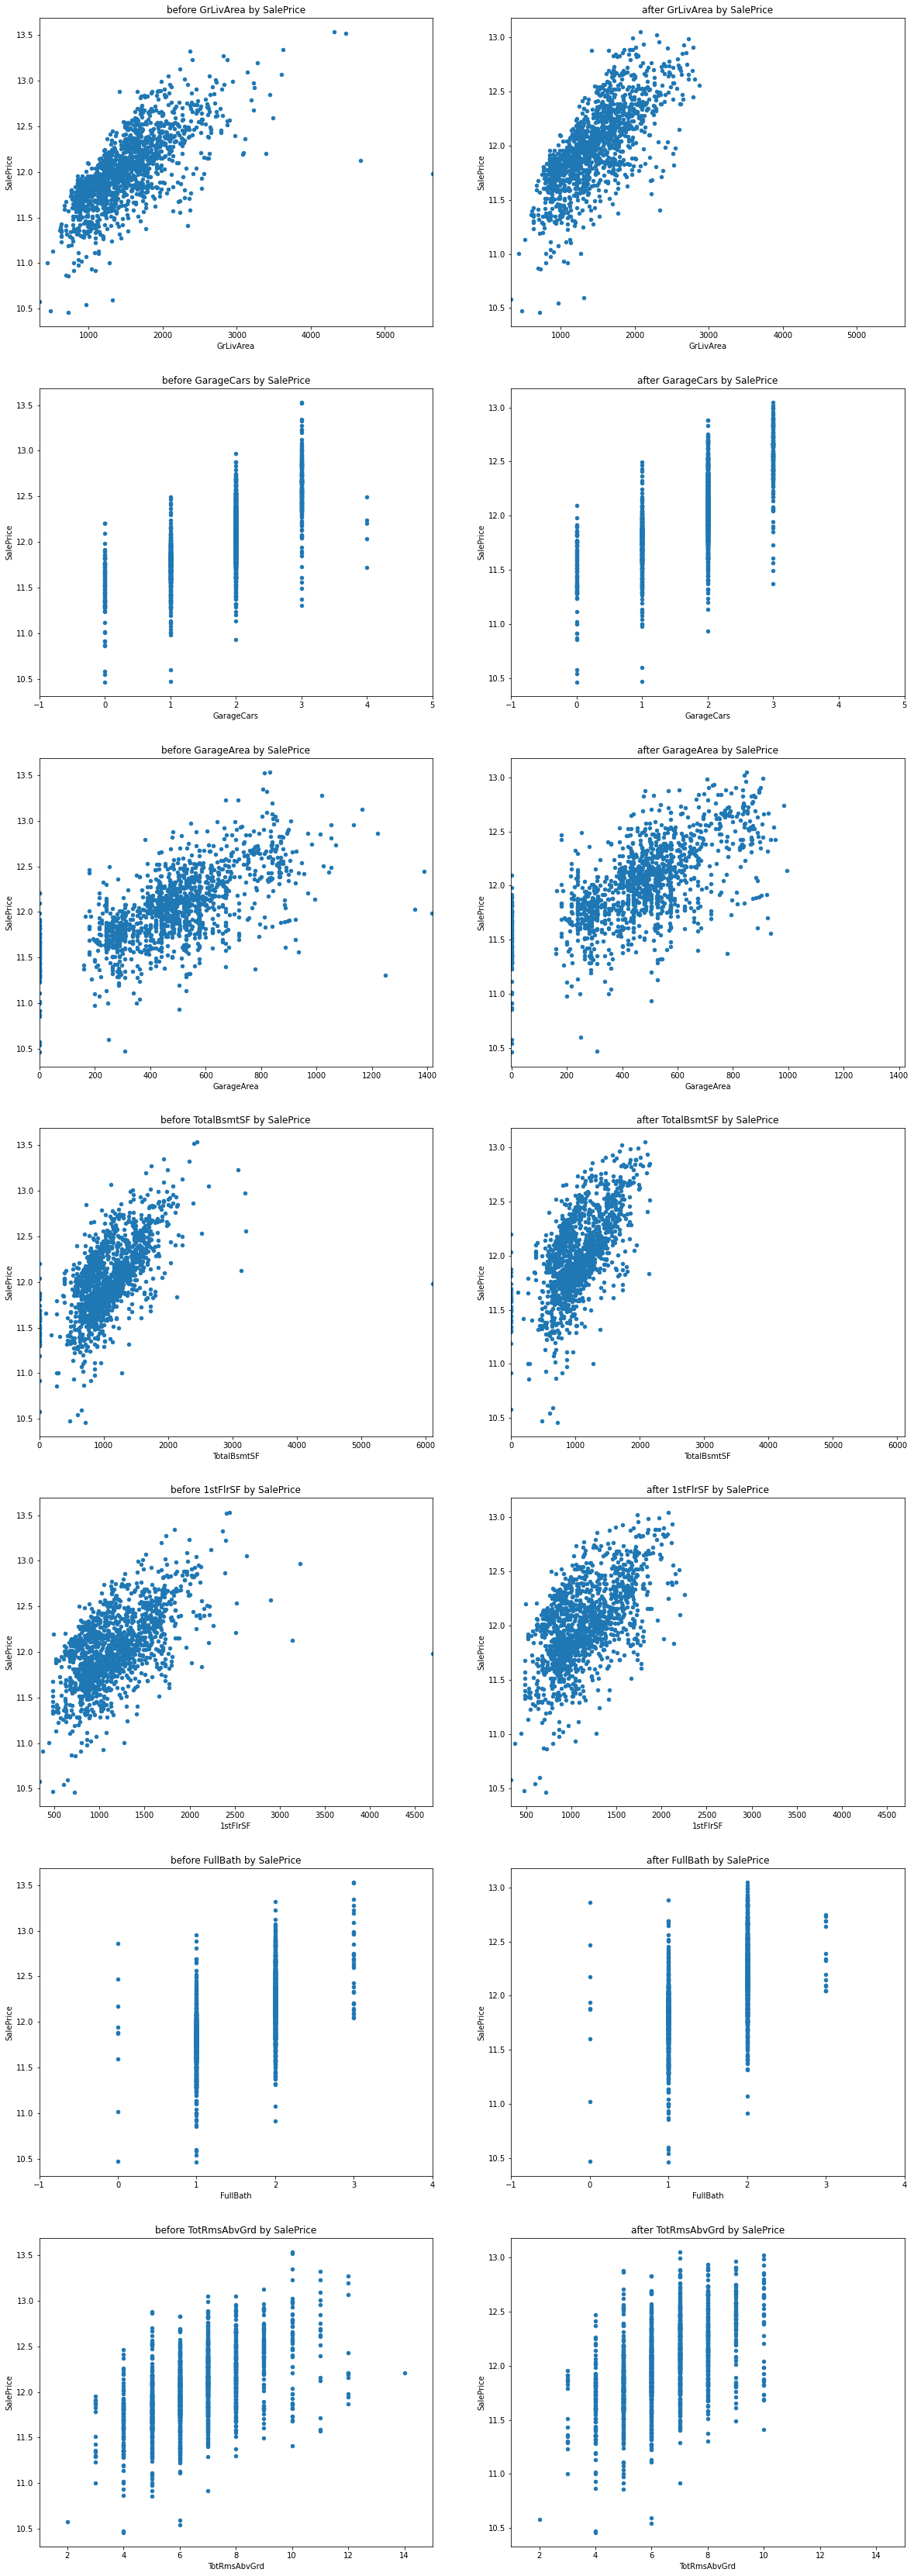

In [25]:
fig, axes = plt.subplots(7, 2, figsize=(20,60))
ax_x, ax_y = 0, 0

xlims = {}

# before
for feature in relevant_num_feats:
    xlims[feature] = [X_y_train[feature].min() - 1, X_y_train[feature].max() + 1]
    X_y_train.plot.scatter(x=feature, y="SalePrice", 
                          ax=axes[ax_y, ax_x], 
                          title=f"before {feature} by SalePrice",
                          xlim=xlims[feature])
    ax_y += 1

ax_x, ax_y = 1, 0
outliers_removed_df = X_y_train.drop(index=outliers_idx) # not inplace

for feature in relevant_num_feats:
    outliers_removed_df.plot.scatter(x=feature, y="SalePrice", 
                                     ax=axes[ax_y, ax_x], 
                                     title=f"after {feature} by SalePrice",
                                     xlim=xlims[feature])
    ax_y += 1

plt.show()

In [26]:
X_y_train.drop(index=outliers_idx, inplace=True)

Whenever we remove an outlier, we need to consider collateral damage. Note that the FullBath variable had 0 outliers identified in our algorithm, yet you can clearly see a difference in the higher limit area. Whether this has a negative impact on our models or not remains to be seen, it may require some experimentation to determine whether the removal/handling of outliers is beneficial despite the high dimensionality of our data.

### 4.1.3 Converting text/categorical attributes

Let's begin by double checking that there aren't any illegal values in these attributes, in other words - do their values match the information in the data_description file. After a quick check, there's a distinct absence of any typos, so we can assume that besides the missing values, our categorical variables are clean. 

However, we'll still need to convert our nominal categories to ensure compatibility with most machine learning models. We'll apply one-hot encoding after we've applied aggregated/decomposed features.

To treat our ordinal categories, we'll transform them into numbered scales

In [27]:
from sklearn.preprocessing import OrdinalEncoder

lotshape_cats = ["IR3","IR2","IR1","Reg"]
landslope_cats = ["Gtl","Mod","Sev"]
overallqual_cats = [1,2,3,4,5,6,7,8,9,10]
overallcond_cats = overallqual_cats.copy()
exterqual_cats = ["Po","Fa","TA","Gd","Ex"]
extercond_cats = exterqual_cats.copy()
heatingqc_cats = exterqual_cats.copy()
kitchenqual_cats = exterqual_cats.copy()
functional_cats = ["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"]
ord_cat_feats_cats = [lotshape_cats, landslope_cats, overallqual_cats,
                      overallcond_cats, exterqual_cats, extercond_cats,
                      heatingqc_cats, kitchenqual_cats, functional_cats]

# we'll apply the ordinal encoder in our pipeline at a later point
enc = OrdinalEncoder(categories=ord_cat_feats_cats)

for df in [X_y_train, X_test]:
     df[ord_cat_feats] = enc.fit_transform(df[ord_cat_feats])

## 4.2 Feature engineering

- Decompose features (categorical, date/time, etc.)
- Aggregate features into promising new features
- Discretize continuous features
- Add promising transformations to features

### 4.2.1 Decompose features/feature extraction

Let's see if we can break down any features to extract additional data that may prove worthwhile to our models.

- MSSubClass: identifies the type of dwelling involved in the sale
  - e.g. 20 = 1-STORY 1946 & NEWER ALL STYLES

Denotes a combination of levels, styles and ages with a number. We could break this column down into those particular categories, however, there already exists features storing this information - HouseStyle, BldgType, and YearBuilt. All the same, there does appear to be some potentially significant information unaccounted for such as stage of completion, conversion, and PUD labeling. We'll hone in on those particular values with a single column outlining these specific peculiarities. 

|MSSubClass|SubClassLevel|SubClassStyle|SubClassAge|
|:--------:|:-----------:|:-----------:|:---------:|
|20|1-STORY|ALL STYLES|'>=1946'|
|30|1-STORY|unknown|'<=1945'|
|40|1-1/2 STORY|finished attic|ALL AGES|
|45|1-1/2 STORY|unfinished|ALL AGES|
|50|1-1/2 STORY|finished|ALL AGES| 
|60|2-STORY|unknown|'>=1946'|
|70|2-STORY|unknown|'<=1945'|
|75|2-1/2 STORY|unknown|ALL AGES|
|80|SPLIT OR MULTI-LEVEL|unknown|unknown|
|85|SPLIT FOYER|unknown|unknown|
|90|DUPLEX|ALL STYLES|ALL AGES|
|120|1-STORY|PUD|'>=1946'|
|150|1-1/2 STORY|PUD|ALL AGES|
|160|2-STORY|PUD|'>=1946'|
|180|MULTI-LEVEL|INCL SPLIT LEV/FOYER|unknown|  
|190|2 FAMILY CONVERSION|ALL STYLES|ALL AGES|

In [28]:
peculiarity = {
   **dict.fromkeys([120,150,160],'PUD'),
   **dict.fromkeys([20,30,60,70,75,80,85,90],'None'),
   180:'INC SPLIT LEV/FOYER',
   50:'FINISHED',
   40:'FINISHED ATTIC',
   45:'UNFINISHED',
   190:'2 FAMILY CONVERSION'
}

for df in [X_test, X_y_train]:
   df['Peculiarity'] = [peculiarity[x] for x in df['MSSubClass']]

- Condition1 and Condition2: proximity to various conditions
  - e.g. Artery = Adjacent to arterial street

Denotes proximity to streets, railroads and parks, or a lack thereof. Separating information like this can be counterproductive, most models are not going to observe the combined impact of two columns that mean the same thing. We can break these two columns down into several binary categories to reflect each possible value.

In [29]:
possible_condition_values = ["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]

for df in [X_test, X_y_train]:
    for value in possible_condition_values:
        values = ['Y' if x == value or y == value else 'N' for x, y in zip(df['Condition1'], df['Condition2'])]
        if value == "Norm":
            df["NormalProximity"] = values
        else:    
            df[f"Near{value}"] = values

- Exterior1st and Exterior2nd: Exterior material covering 
  - e.g. AsbShng = Asbestos Shingles

Denotes the one or two materials used on the exterior of the house, or a lack thereof. Like the above, we have two separate columns to cover multiple values. Again, we can break these two columns down into several binary categories.  

In [30]:
possible_exterior_values = ["AsbShng","AsphShn","BrkComm","BrkFace",
                            "CBlock","CemntBd","HdBoard","ImStucc",
                            "MetalSd","Other","Plywood","PreCast",
                            "Stone","Stucco","VinylSd","Wd Sdng","WdShing"]

for df in [X_test, X_y_train]:
    for value in possible_exterior_values:
        df[f"Exterior{value}"] = ['Y' if x == value or y == value else 'N' for x, y in zip(df['Exterior1st'], df['Exterior2nd'])]

### 4.2.2 Aggregate features into promising new features

By combining relevant features together, we can group information together or create new information entirely. Considering we have quite a few collinear predictors, we'll want to mitigate the presence of multicollinearity.

As a reminder, some of our collinear features are:
- GarageArea - GarageCars
- TotRmsAbvGrd - [GrLivArea,BedroomAbvGr,2ndFlrSF]
- GrLivArea - [2ndFlrSF,FullBath]
- 2ndFlrSF - [GrLivArea,HalfBath,TotalRmsAbvGrd]
- 1stFlrSF - TotalBsmtSF

Looking at a few possible combinations, we can create new features representing:

- Total building square footage = TotalBsmtSF + GrLivArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
- Has modern features = 'Y' if YearRemodAdd >= 1990 or YearBuilt >= 1990 else 'N'
- Has modern garage = 'Y' if GarageYrBlt >= 1990 else 'N'
- Average property quality = (Fence + PoolQC + GarageQual + GarageCond + ExterCond + ExterQual + FireplaceQu + KitchenQual + Electrical + HeatingQC + BsmtCond)/n
- Total number of full bathrooms = FullBath + BsmtFullBath
- Total number of half bathrooms = HalfBath + BsmtHalfBath

In [31]:
quality = {"EX":5,"GD":4,"TA":3,"FA":2,"PO":1,"NA":0,
            "GDPRV":4,"MNPRV":3,"GDWO":2,"MNWW":1,
            "SBRKR":5,"FUSEA":4,"MIXED":3,"FUSEF":2,"FUSEP":1}

def avg_qual(variables:list) -> float:
    total, n = 0, 0
    for var in variables:
       if isinstance(var, (np.int64, float)):
           value = var
       else: # string val according to above values
           value = quality.get(var.upper(), 0)
       if value != 0:
           total += value
           n += 1
    return round(total/n,3) 

for df in [X_y_train, X_test]:
    df["TotalBuildingSF"] = df["TotalBsmtSF"] + df["GrLivArea"] + df["WoodDeckSF"] + df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
    # max year built is 2010, so we're using 1990 as the min year gap for modern features
    df["HasModernFeatures"] = ['Y' if (isinstance(x,np.int64) and x >= 1990) or (isinstance(y,int) and y >= 1990) else 'N' for x, y in zip(df['YearRemodAdd'], df['YearBuilt'])]
    df["HasModernGarage"] = ['Y' if isinstance(x,np.int64) and x >= 1990 else 'N' for x in df['GarageYrBlt']]
    qual_cols = zip(df["Fence"], df["PoolQC"], df["GarageQual"], 
                    df["GarageCond"], df["ExterCond"], df["ExterQual"], 
                    df["FireplaceQu"], df["KitchenQual"], df["Electrical"], 
                    df["HeatingQC"], df["BsmtCond"])
    df["AvgPropertyQual"] = [avg_qual(elements) for *elements, in qual_cols]
    df["TotalBathrooms"] = df["FullBath"] + df["BsmtFullBath"]
    df["TotalHalfBathrooms"] = df["HalfBath"] + df["BsmtHalfBath"]


Let's get a sense of these new features relationship with SalePrice

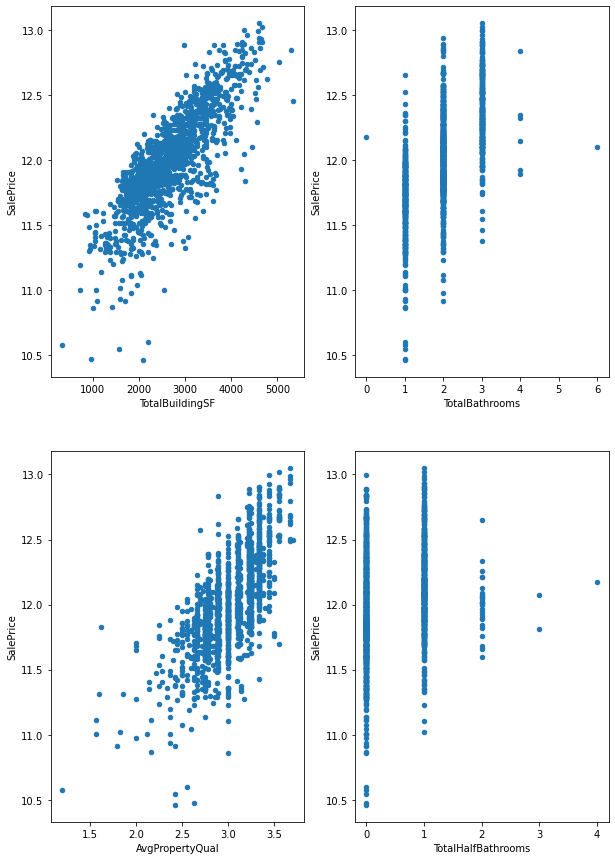

In [32]:
aggregate_nums = ["TotalBuildingSF","AvgPropertyQual","TotalBathrooms","TotalHalfBathrooms"]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,15))
x = 0
y = 0

for var in aggregate_nums:
    X_y_train.plot.scatter(ax=axes[x,y], y="SalePrice", x=var)
    x += 1
    if x == 2:
        x = 0
        y += 1

In [33]:
X_y_train[aggregate_nums+["SalePrice"]].corr()["SalePrice"].sort_values(ascending=False)

SalePrice            1.00
TotalBuildingSF      0.81
AvgPropertyQual      0.71
TotalBathrooms       0.60
TotalHalfBathrooms   0.27
Name: SalePrice, dtype: float64

TotalBuildingSF seems particularly important to consider here!

What about our categorical HasModernFeatures variable?

<AxesSubplot:title={'center':'SalePrice'}, xlabel='HasModernFeatures'>

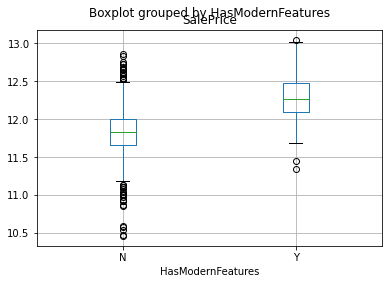

In [34]:
X_y_train.boxplot("SalePrice", by="HasModernFeatures")

In [35]:
association = get_cat_num_associations(X_y_train, ["HasModernFeatures"], "SalePrice") 

Can't perform anova test on HasModernFeatures since it has only 2 possible values, reverting to t test:
t = 28.21331892991716, p_val = 5.934088813967987e-139
HasModernFeatures's Y and N have SalePrice means that are statistically different



### 4.2.3 Discretize continuous features

All features with a float64 type are made up of only whole numbers - so let's convert them.

In [36]:
for df in [X_test, X_y_train]:
    for column in df:
        if df[column].dtype in ["float64", "int64"] and column not in [target_var, 'AvgPropertyQual']:
            # convert it to numeric safely
            df[column] = np.floor(pd.to_numeric(df[column], errors='coerce')).astype('Int64')

As well as discretize our only float feature - AvgPropertyQual

In [37]:
from sklearn.preprocessing import KBinsDiscretizer

# discretize our continuous variables
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_test['AvgPropertyQual'] = kbins.fit_transform(X_test[['AvgPropertyQual']])
X_y_train['AvgPropertyQual'] = kbins.fit_transform(X_y_train[['AvgPropertyQual']])


### 4.2.4 Add promising transformations to features

For now, let's simply apply onehot encoding to our categorical features.

In [38]:
# we're first going to convert date features into strings since they should be considered as categories/objects
for df in [X_y_train, X_test]:
    for col in ['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd','MoSold']:
        df[col] = df[col].apply(str)

In [39]:
train_nom_cat_feats = X_y_train.select_dtypes('object').columns
test_nom_cat_feats = X_test.select_dtypes('object').columns

dummies = pd.get_dummies(X_y_train[train_nom_cat_feats],
                        prefix=train_nom_cat_feats,
                        columns=train_nom_cat_feats,
                        drop_first=True)
X_y_train = pd.concat([dummies, X_y_train], axis=1).drop(train_nom_cat_feats, axis=1)

dummies = pd.get_dummies(X_test[test_nom_cat_feats],
                        prefix=test_nom_cat_feats,
                        columns=test_nom_cat_feats,
                        drop_first=True)
X_test = pd.concat([dummies, X_test], axis=1).drop(test_nom_cat_feats, axis=1)


## 4.3 Feature scaling

Considering that our numerical distributions have a wide variety of variances, we want to avoid attributing more weight to variances with large orders of magnitude.

We'll use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) to standardize our numerical features around $\mu$ = 0 and $\sigma^2$ = 1

In [40]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
y_train = X_y_train["SalePrice"]
X_train = X_y_train.drop(labels=["SalePrice"], axis=1)
xtest_num_feats = list(X_test.select_dtypes('Int64'))
xtrain_num_feats = list(X_train.select_dtypes('Int64'))

X_train[xtrain_num_feats] = standard_scaler.fit_transform(X_y_train[xtrain_num_feats])
X_test[xtest_num_feats] = standard_scaler.fit_transform(X_test[xtest_num_feats])

## 4.4 Feature selection

We are dealing with a high dimension dataset and are therefore exposed to issues such as the curse of dimensionality and multicollinearity. 
These are problems that affect the performance of most models, so we'll apply PCA (principal component analysis) to reduce the dimensionality while preserving as much essential information as possible.



In [41]:
from sklearn.decomposition import PCA

# some of our dummy variables will not exist in one set over the other, let's remove these
# so that we can apply PCA to both sets
intersecting_features = X_train.columns.intersection(X_test.columns)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train[intersecting_features])
X_test_pca = pca.transform(X_test[intersecting_features])

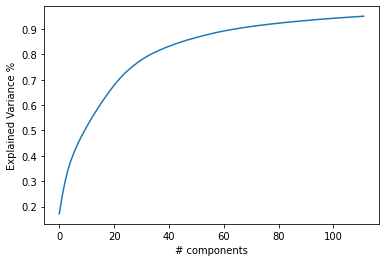

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('Explained Variance %')
plt.show()

114 features out of 555 explain approximately 95% of the variance in our models

# 5. Select a model
- Train many quick and dirty models from different categories using standard parameters
- Analyze the type of errors the models make
- Perform a quick round of feature selection and engineering
- Perform and iterate on the last previous steps until...
- You can shortlist the 3-5 most promising models

In [43]:
# # unfinished pipeline logic, complexity is not worth the time investment

# # grabbing the libraries we need
# from sklearn import set_config
# set_config(display="diagram")                            # displays pipeline
# from sklearn.impute import SimpleImputer                 # imputation transformer to deal with missing values
# from sklearn.compose import ColumnTransformer            # applies transformers to columns
# from sklearn.pipeline import Pipeline                    # applies a pipeline of transforms with a final estimator
# from sklearn.base import BaseEstimator, TransformerMixin # base classes for estimators and mixin class for transformers
# from sklearn.model_selection import cross_val_predict    # to evaluate our models via k cross fold 
# from sklearn.utils.validation import check_is_fitted
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.preprocessing import OneHotEncoder

# def get_indices(col_names: list) -> list:
#     # check col_names for typos
#     for name in col_names:
#         if name not in np_i.keys():
#             raise ValueError(f"{name} does not exist - possible names are: {np_i.keys()}")
#     return [index for key, index in np_i.items() if key in col_names]

# def get_list_without(super_set: list, excluded: list) -> list:
#     # return a list without a few elements
#     return [item for item in super_set if item not in excluded]

# class GroupbyImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, groupby_cols: list, target: str, metric: str='median'):
#         print("GroupbyINIT")
#         self.groupby_cols = groupby_cols
#         self.target = target
#         self.metric = metric

#     def fit(self, X, y=None) -> object:
#         print("GroupbyImputer fit")
#         print("X:",type(X))
#         print(X.head(5))
#         self.impute_map_: pd.DataFrame = X.groupby(by=self.groupby_cols)[self.target].agg(self.metric).reset_index(drop=False)
#         print("Impute_map:",type(self.impute_map_))
        
#         return self

#     def transform(self, X, y=None) -> np.array:
#         print("GroupbyImputer transform")
#         print("X:",type(X))
#         check_is_fitted(self, 'impute_map_')
#         X = deepcopy(X)
#         for _, row in self.impute_map_.iterrows():
#             ind = (X[self.groupby_cols] == row[self.groupby_cols]).all(axis=1)
#             X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
#         return X.values

# class OutlierExtractor(TransformerMixin):
#     def __init__(self, threshold: float = -10.0):
#         self.threshold = threshold

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y) -> tuple:
#         X = np.asarray(X)
#         y = np.asarray(y)
#         lof = LocalOutlierFactor()
#         lof.fit(X)
#         # keep rows within the threshold
#         return (X[lof.negative_outlier_factor_ > self.threshold, :],y[lof.negative_outlier_factor_ > self.threshold])

# included_decomp_cols = ["MSSubClass","Condition1","Condition2","Exterior1st","Exterior2nd"]

# class DecomposeFeatures(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self 
    
#     def decompose_MSSubClass(self, df: pd.DataFrame) -> np.array:
#         np_i['Peculiarity'] = len()
#         return pd.Series([peculiarity[x] for x in df['MSSubClass']]).to_numpy()
    
#     def decompose_conditions(self, df: pd.DataFrame) -> tuple:
#         decomposed_cols: list = []
#         for value in possible_condition_values:
#             values = ['Y' if x == value or y == value else 'N' for x, y in zip(df['Condition1'], df['Condition2'])]
#             if value == "Norm":
#                 self.df["NormalProximity"] = values
#                 decomposed_cols.append(df["NormalProximity"].to_numpy())
#             else:    
#                 self.df[f"Near{value}"] = values
#                 decomposed_cols.append(df[f"Near{value}"].to_numpy())
        
#         return tuple(decomposed_cols)
    
#     def decompose_exteriors(self, df: pd.DataFrame) -> tuple:
#         decomposed_cols: list = []
#         for value in possible_exterior_values:
#             df[f"Exterior{value}"] = ['Y' if x == value or y == value else 'N' for x, y in zip(df['Exterior1st'], df['Exterior2nd'])]
#             decomposed_cols.append(df[f"Exterior{value}"].to_numpy())
        
#         return tuple(decomposed_cols)
    
#     def decompose_all(self, df: pd.DataFrame) -> tuple:
#         a = self.decompose_MSSubClass(df)
#         b = self.decompose_conditions(df)
#         c = self.decompose_exteriors(df)
#         return a, b, c

#     def transform(self, X: np.array):
#         df = pd.DataFrame(X, columns=included_decomp_cols)
#         return np.c_[X, self.decompose_all(df)]

# included_aggregate_cols = ["TotalBsmtSF","GrLivArea","WoodDeckSF",
#                            "OpenPorchSF","EnclosedPorch","3SsnPorch",
#                            "ScreenPorch","YearRemodAdd","YearBuilt",
#                            "GarageYrBlt","Fence","PoolQC",
#                            "GarageQual","FireplaceQu","KitchenQual",
#                            "Electrical","HeatingQC","BsmtCond",
#                            "FullBath","BsmtFullBath","HalfBath",
#                            "BsmtHalfBath"]

# class AggregateFeatures(BaseEstimator, TransformerMixin):
#     def fit(self, X: np.array, y=None):
#         return self 

#     def aggregate_all(self, X: np.array) -> tuple:
#         df = pd.DataFrame(X, columns=included_aggregate_cols)
#         df["TotalBuildingSF"] = df["TotalBsmtSF"] + df["GrLivArea"] +\
#                                 df["WoodDeckSF"] + df["OpenPorchSF"] +\
#                                 df["EnclosedPorch"] + df["3SsnPorch"] +\
#                                 df["ScreenPorch"]
#         # max year built is 2010, so we're using 1990 as the min year gap for modern features
#         df["HasModernFeatures"] = ['Y' if (isinstance(x,np.int64) and x >= 1990) or (isinstance(y,int) and y >= 1990) else 'N' for x, y in zip(df['YearRemodAdd'], df['YearBuilt'])]
#         df["HasModernGarage"] = ['Y' if isinstance(x,np.int64) and x >= 1990 else 'N' for x in df['GarageYrBlt']]
#         qual_cols = zip(df["Fence"], df["PoolQC"], df["GarageQual"], 
#                         df["GarageCond"], df["ExterCond"], df["ExterQual"], 
#                         df["FireplaceQu"], df["KitchenQual"], df["Electrical"], 
#                         df["HeatingQC"], df["BsmtCond"])
#         df["AvgPropertyQual"] = [avg_qual(elements) for *elements, in qual_cols]
#         # binning the only known float in our dataset while we're at it
#         kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#         df["AvgPropertyQual"] = kbins.fit_transform(df[['AvgPropertyQual']])
#         df["TotalBathrooms"] = df["FullBath"] + df["BsmtFullBath"]
#         df["TotalHalfBathrooms"] = df["HalfBath"] + df["BsmtHalfBath"]
#         aggregate_feats: tuple = (df["TotalBuildingSF"].to_numpy(), df["HasModernFeatures"].to_numpy(),
#                                   df["HasModernGarage"].to_numpy(), df["AvgPropertyQual"].to_numpy(),
#                                   df["TotalBathrooms"].to_numpy(), df["TotalHalfBathrooms"].to_numpy())
#         return aggregate_feats

#     def transform(self, X: np.array):
#         a, b, c, d, e, f = self.aggregate_all(X)
#         return np.c_[X, a, b, c, d, e, f]

In [44]:
# unfinished pipeline, complexity is not worth the time investment

# X_train: pd.DataFrame = X_y_train.drop('SalePrice', axis=1)

# # features to pass in our pipelines for transformation
# num_feats = X_train.select_dtypes('int64') + X_train.select_dtypes('float64')
# cat_feats = X_train.select_dtypes('object')

# # let's keep track of the indices for each column name
# num_np_i = {key:index for (index,key) in enumerate(num_feats)}
# ord_cat_np_i = {key:index for (index,key) in enumerate(cat_feats) if key in ord_cat_feats}
# nom_cat_np_i = {key:index for (index,key) in enumerate(cat_feats) if key in nom_cat_feats}
# cat_np_i = {**ord_cat_np_i, **nom_cat_np_i}

# # merge dicts
# np_i = {**num_np_i, **cat_np_i}

# num_groupby_imputer = ColumnTransformer(
#     transformers = [
#         ("LotFrontage_imputer", GroupbyImputer(groupby_cols=["LandContour","Neighborhood","Street"],target="LotFrontage",metric="median"), get_indices(["LandContour","Neighborhood","Street","LotFrontage"])),
#     ], remainder='passthrough'
# )

# num_imputers_cols_transformed = ["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","MasVnrArea"]

# num_imputers = ColumnTransformer(
#     transformers = [
#         ('none_imputer', SimpleImputer(strategy='constant', fill_value='None'), get_indices(['GarageYrBlt'])),
#         ('zero_imputer', SimpleImputer(strategy='constant', fill_value=0), get_indices(['GarageCars', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea'])),
#         ('other_num_imputer', SimpleImputer(strategy='median'), get_indices(get_list_without(num_feats, num_imputers_cols_transformed)))
#     ], remainder='passthrough')


# cat_imputers = ColumnTransformer(
#     transformers = [
#         ('MasVnr_imputer', SimpleImputer(strategy='constant', fill_value='None'), get_indices(['MasVnrType'])),
#         ('other_cat_imputer', SimpleImputer(strategy='most_frequent'), get_indices(get_list_without(cat_feats, ['MasVnrType'])))
#     ], remainder='passthrough'
# )

# feature_extractions = ColumnTransformer(
#     transformers = [
#         ('decomposition', DecomposeFeatures(), get_indices(included_decomp_cols)),
#         ('aggregation', AggregateFeatures(), get_indices(included_aggregate_cols))
#     ], remainder='passthrough'
# )

# feature_conversions = ColumnTransformer(
#     transformers = [
#         ('onehot_encoding', OneHotEncoder(handle_unknown="ignore"), get_indices(nom_cat_feats)),
#         ('ordinal_encoding', OrdinalEncoder(categories=ord_cat_feats_cats), get_indices(ord_cat_feats)),
#         ('scaling', StandardScaler(), get_indices(num_feats))
#     ], remainder='passthrough'
# )


# numerical_cleaning = Pipeline(
#     steps = [
#         ('num_groupby_imputer', num_groupby_imputer),
#         ('num_imputers', num_imputers),
#         ('num_outliers', OutlierExtractor())
#     ]
# )

# cleaning = ColumnTransformer(
#     transformers = [
#         ('numerical_cleaning', numerical_cleaning, num_feats),
#         ('categorical_cleaning', cat_imputers, cat_feats)
#     ], remainder='passthrough'
# )

# preprocessor = Pipeline(
#     steps = [
#         ('cleaning', cleaning),
#         ('extractions', feature_extractions),
#         ('conversions', feature_conversions)
#     ]
# )

# preprocessor

## 5.1 Train many quick and dirty models

Because of the no free lunch theorem, there's no way to know which model will best perform for our particular situation. However, we can base some of our modeling decisions based on some aspects of our data. We know that we need a model that is robust against collinearity, so let's keep that in mind.

1. Ridge (linear least squares with l2 regularization): A linear model with a regularization parameter favoring bias over high variance. Error is minimized by minimizing the complexity/reducing the number of features such that it reduces the linear least squares.

$$ MIN \sum{(y_i - w_ix_i)^2} $$

2. SVR - Epsilon-Support Vector Regression: In contrast to Ridge, this model minimizes the coefficients (l2 regularization and Slack)

$$ MIN \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}|\xi_i| \text{ such that } |y_i - w_ix_i| \leq \epsilon $$

3. GBR - Gradient Boosting Regressor: Ensemble model that utilizes gradient descent to minimize the loss of decision trees
4. Huber Regressor: A linear model that is robust against outliers
5. Random Forest Regressor: Ensemble model that aggregates the result of many decision trees and outputs the optimal result

---

Model: Ridge
Max Error = 0.6426461613391137
MAE = 0.06401018383422694
RMSE = 0.09146005263155046



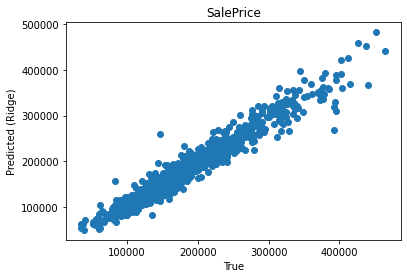

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: Huber
Max Error = 1.6783713365449753
MAE = 0.09025818073853999
RMSE = 0.15880178658445424



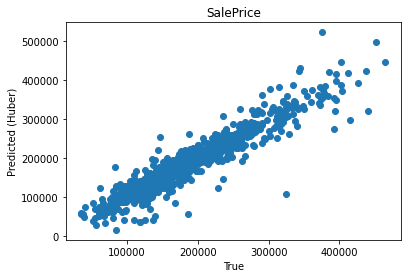

Model: SVR
Max Error = 0.6250609344170677
MAE = 0.06406719434712561
RMSE = 0.08208459106728172



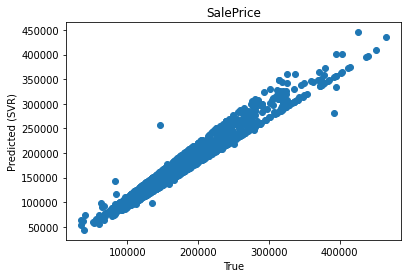

Model: GBR
Max Error = 0.7010407209608722
MAE = 0.06162772712754377
RMSE = 0.08264443412590358



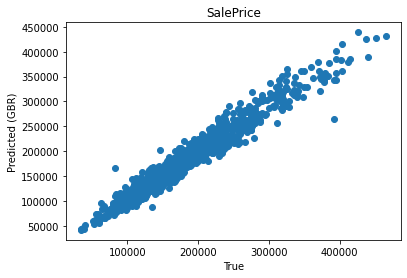

Model: RFR
Max Error = 0.4367290900092531
MAE = 0.03377940616741825
RMSE = 0.04953359183072147



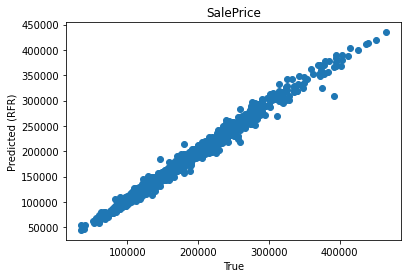

In [45]:
from sklearn.linear_model import RidgeCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

def print_model_metrics(y_true, y_pred, name):
    print(f"Model: {name}")
    print(f"Max Error = {max_error(y_true, y_pred)}")
    print(f"MAE = {mean_absolute_error(y_true, y_pred)}")
    print(f"RMSE = {mean_squared_error(y_true, y_pred, squared=False)}\n")

def test_parameterless_models(models: list):
    for name, model in models:
        obj_instance = model
        model_cv = obj_instance.fit(X_train, y_train)
        y_pred_train = model_cv.predict(X_train)
        #print_model_metrics(np.expm1(y_train), np.expm1(y_pred_train), name)
        print_model_metrics(y_train, y_pred_train, name)
        plt.scatter(np.expm1(y_train), np.expm1(y_pred_train))
        plt.title('SalePrice')
        plt.xlabel('True')
        plt.ylabel(f'Predicted ({name})')
        plt.show()

supervised_regression_models = [("Ridge",RidgeCV()), 
                                ("Huber",HuberRegressor()),
                                ("SVR",SVR()), 
                                ("GBR", GradientBoostingRegressor()),
                                ("RFR", RandomForestRegressor())]

test_parameterless_models(supervised_regression_models)

On inspection, all of our models do quite well up until significant errors are made in the high-end price range. This is most likely due to a lack of data, which we can't do much about.

We'll move forward with our top two performing models, which leads us to our two ensemble models: Random Forest Regression and Gradient Boost Regression.

For the sake of this version, we'll stop here and see how we perform when submitting our top model as is.

In [46]:
model = RandomForestRegressor()
model_cv = model.fit(X_train_pca, y_train)
salesprice_predictions = np.expm1(model.predict(X_test_pca))

submission = pd.DataFrame({'Id': X_test_id, 'SalePrice': salesprice_predictions}) 
submission.to_csv("submission.csv", index=False)